In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
plt.style.use('bmh')

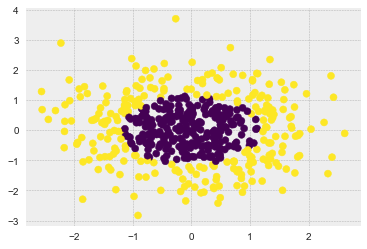

In [49]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征
# 可以生成两类或多类数据
x_data, y_data = make_gaussian_quantiles(n_samples=500, n_features=2,n_classes=2)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data,cmap='viridis')
plt.show()

In [50]:
logistic=linear_model.LogisticRegression()
logistic.fit(x_data,y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

score 0.518


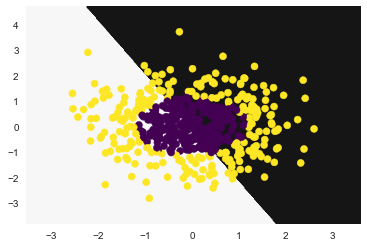

In [51]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)

# 等高线图
cs = plt.contourf(xx, yy, z)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data,cmap='viridis')
print('score',logistic.score(x_data,y_data))
#可见线性不太好

In [52]:
poly_reg=PolynomialFeatures(degree=5)
x_poly=poly_reg.fit_transform(x_data)
logistic=linear_model.LogisticRegression()
logistic.fit(x_poly,y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

score 0.992


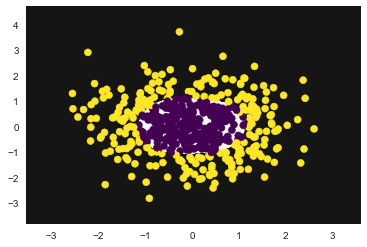

In [53]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)

# 等高线图
cs = plt.contourf(xx, yy, z)
plt.scatter(x_data[:,0],x_data[:,1],c=y_data,cmap='viridis')
print('score',logistic.score(x_poly,y_data))